In [1]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2


In [3]:
from vicon.dereplication.derep import run_vsearch
from vicon.alignment.ref_align import run_viralmsa
from vicon.processing.sample_processing import process_all_samples
from vicon.visualization.plots import plot_non_gap_counts
from vicon.processing.coverage_analysis import abundant_kmers, crop_df, build_coverage_table, top_kmers_df, find_most_frequent_and_calculate_mismatches, get_i_th_kmers, select_best_kmers, count_seq_coverage, find_best_pair_kmer
from vicon.io.fasta import read_fasta_to_dataframe
from vicon.processing.sample_processing import pipeline_results_cleaner
from vicon.utils.helpers import count_non_gap_characters_from_dataframe, combine_fasta_files
from vicon.visualization.plots import plot_rel_cons
from vicon.io.fasta import create_folders_and_save_sequences, read_fasta, remove_first_record, read_fasta_to_dataframe
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import shutil

In [9]:

import os

# Get the base path from the environment variable
base_path = os.getenv("PROJECTS_PATH")
base_path = f"{base_path}vicon/"
print(base_path)


/fast/AG_Ohler/ekarimi/projects/vicon/


In [10]:
combine_fasta_files(
    '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/samples/full_separated_Fasta/',
    '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples.fasta'
)

combine_fasta_files(
    '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/samples/partial_separated_Fasta/',
    '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/partial_samples.fasta'
)

combine_fasta_files(
    '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/',
    '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/all_samples/all.fasta'
)

combine_fasta_files(
    '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/samples/full_separated_Fasta/',
    '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples/full.fasta'
)


Found 155 FASTA files
Processing: AB728839.1.fasta
Processing: DQ315364.2.fasta
Processing: HM565136.3.fasta
Processing: KF303069.1.fasta
Processing: KF303070.1.fasta
Processing: KF303071.1.fasta
Processing: KU162869.1.fasta
Processing: KX868523.2.fasta
Processing: KY316160.1.fasta
Processing: KY316161.1.fasta
Processing: KY316162.1.fasta
Processing: KY316163.1.fasta
Processing: KY316164.1.fasta
Processing: L19443.1.fasta
Processing: LC791124.1.fasta
Processing: LC791141.1.fasta
Processing: LC791143.1.fasta
Processing: LC791176.1.fasta
Processing: LC791177.1.fasta
Processing: MG925782.1.fasta
Processing: MG925783.1.fasta
Processing: MH465394.1.fasta
Processing: MK883610.1.fasta
Processing: MK883611.1.fasta
Processing: MK955315.1.fasta
Processing: MK955316.1.fasta
Processing: MK955317.1.fasta
Processing: MK955318.1.fasta
Processing: MK955319.1.fasta
Processing: MK962806.1.fasta
Processing: MK962807.1.fasta
Processing: MK962808.1.fasta
Processing: MK962809.1.fasta
Processing: MK962810.1.

In [11]:


VIRUS = "adenoV_full"
INPUT_SAMPLE = f"{base_path}data/adenoV/full_samples/full.fasta"
INPUT_REFERENCE = f"{base_path}data/adenoV/reference/ON532820_Adeno41_lineage_1.fasta"

VIRALMSA_PATH = os.path.join(f"{base_path}scripts/ViralMSA.py")
OUTPUT_DIR = os.path.join(f"{base_path}results", VIRUS)

# Parameters for Tools
EMAIL = "email@address.com"
KMER_SIZE = 200
THRESHOLD = 190
L_GENE_START = -1
L_GENE_END = 35000

SAMPLE_DIR = os.path.dirname(INPUT_SAMPLE)
REFERENCE_DIR = os.path.dirname(INPUT_REFERENCE)

LOG_DIR = os.path.join(OUTPUT_DIR, "logs")
MAIN_DF_PATH = os.path.join(OUTPUT_DIR, "aggregated_results.csv")
KMER1_PATH = os.path.join(OUTPUT_DIR, "kmer1.csv")
KMER2_PATH = os.path.join(OUTPUT_DIR, "kmer2.csv")

# File Names
SAMPLE_NAME = os.path.basename(INPUT_SAMPLE)
REFERENCE_NAME = os.path.basename(INPUT_REFERENCE)

# Paths
DEREP_FASTA = os.path.join(SAMPLE_DIR, "derep.fasta")
CLUSTERS_UC = os.path.join(SAMPLE_DIR, "clusters.uc")
ALIGNED_DIR = os.path.join(SAMPLE_DIR, "aligned")
if os.path.exists(ALIGNED_DIR):
    shutil.rmtree(ALIGNED_DIR)
DEREP_FASTA_ALN = os.path.join(ALIGNED_DIR, "derep.fasta.aln")



# Example Usage of Paths and Functions
run_vsearch(INPUT_SAMPLE, DEREP_FASTA, CLUSTERS_UC)
run_viralmsa(
    email=EMAIL, 
    sample_fasta=DEREP_FASTA, 
    output_dir=ALIGNED_DIR, 
    reference_fasta=INPUT_REFERENCE, 
    script_path=VIRALMSA_PATH
)

remove_first_record(DEREP_FASTA_ALN, DEREP_FASTA_ALN)

# Process all samples and aggregate results
df, mask = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=THRESHOLD, only_valid_kmers=True)
df3, mask3 = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=KMER_SIZE-3, only_valid_kmers=True)

# Save aggregated results
# df.to_csv(MAIN_DF_PATH)
# print("Aggregated results saved.")

# df = pd.read_csv(MAIN_DF_PATH, index_col="SampleID")
df


vsearch v2.29.1_linux_x86_64, 1509.9GB RAM, 80 cores
https://github.com/torognes/vsearch

Dereplicating file /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples/full.fasta 100%
5290446 nt in 155 seqs, min 33451, max 34237, avg 34132
Sorting 100%
147 unique sequences, avg cluster 1.1, median 1, max 3
Writing FASTA output file 100%
Writing uc file, first part 100%
Writing uc file, second part 100%
The first record has been removed. Updated FASTA saved to: /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples/aligned/derep.fasta.aln


,0,1,2,3,4,5,6,7,8,9,...,33823,33824,33825,33826,33827,33828,33829,33830,33831,33832
SampleID,,,,,,,,,,,,,,,,,,,,,
MW567964.1_LOCUS_______MW567964_______________34102_bp____DNA_____linear___VRL_08-MAR-2021;size=3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
L19443.1_LOCUS_______L19443_________________34214_bp____DNA_____linear___VRL_27-APR-2012;size=2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ON442312.1_LOCUS_______ON442312_______________34181_bp____DNA_____linear___VRL_25-MAY-2022;size=2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ON442319.1_LOCUS_______ON442319_______________34198_bp____DNA_____linear___VRL_25-MAY-2022;size=2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
OP174919.1_LOCUS_______OP174919_______________34179_bp____DNA_____linear___VRL_23-MAY-2023;size=2,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OR628212.1_LOCUS_______OR628212_______________33877_bp____DNA_____linear___VRL_05-NOV-2023;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR628213.1_LOCUS_______OR628213_______________34069_bp____DNA_____linear___VRL_09-AUG-2024;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR628214.1_LOCUS_______OR628214_______________34121_bp____DNA_____linear___VRL_05-NOV-2023;size=1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


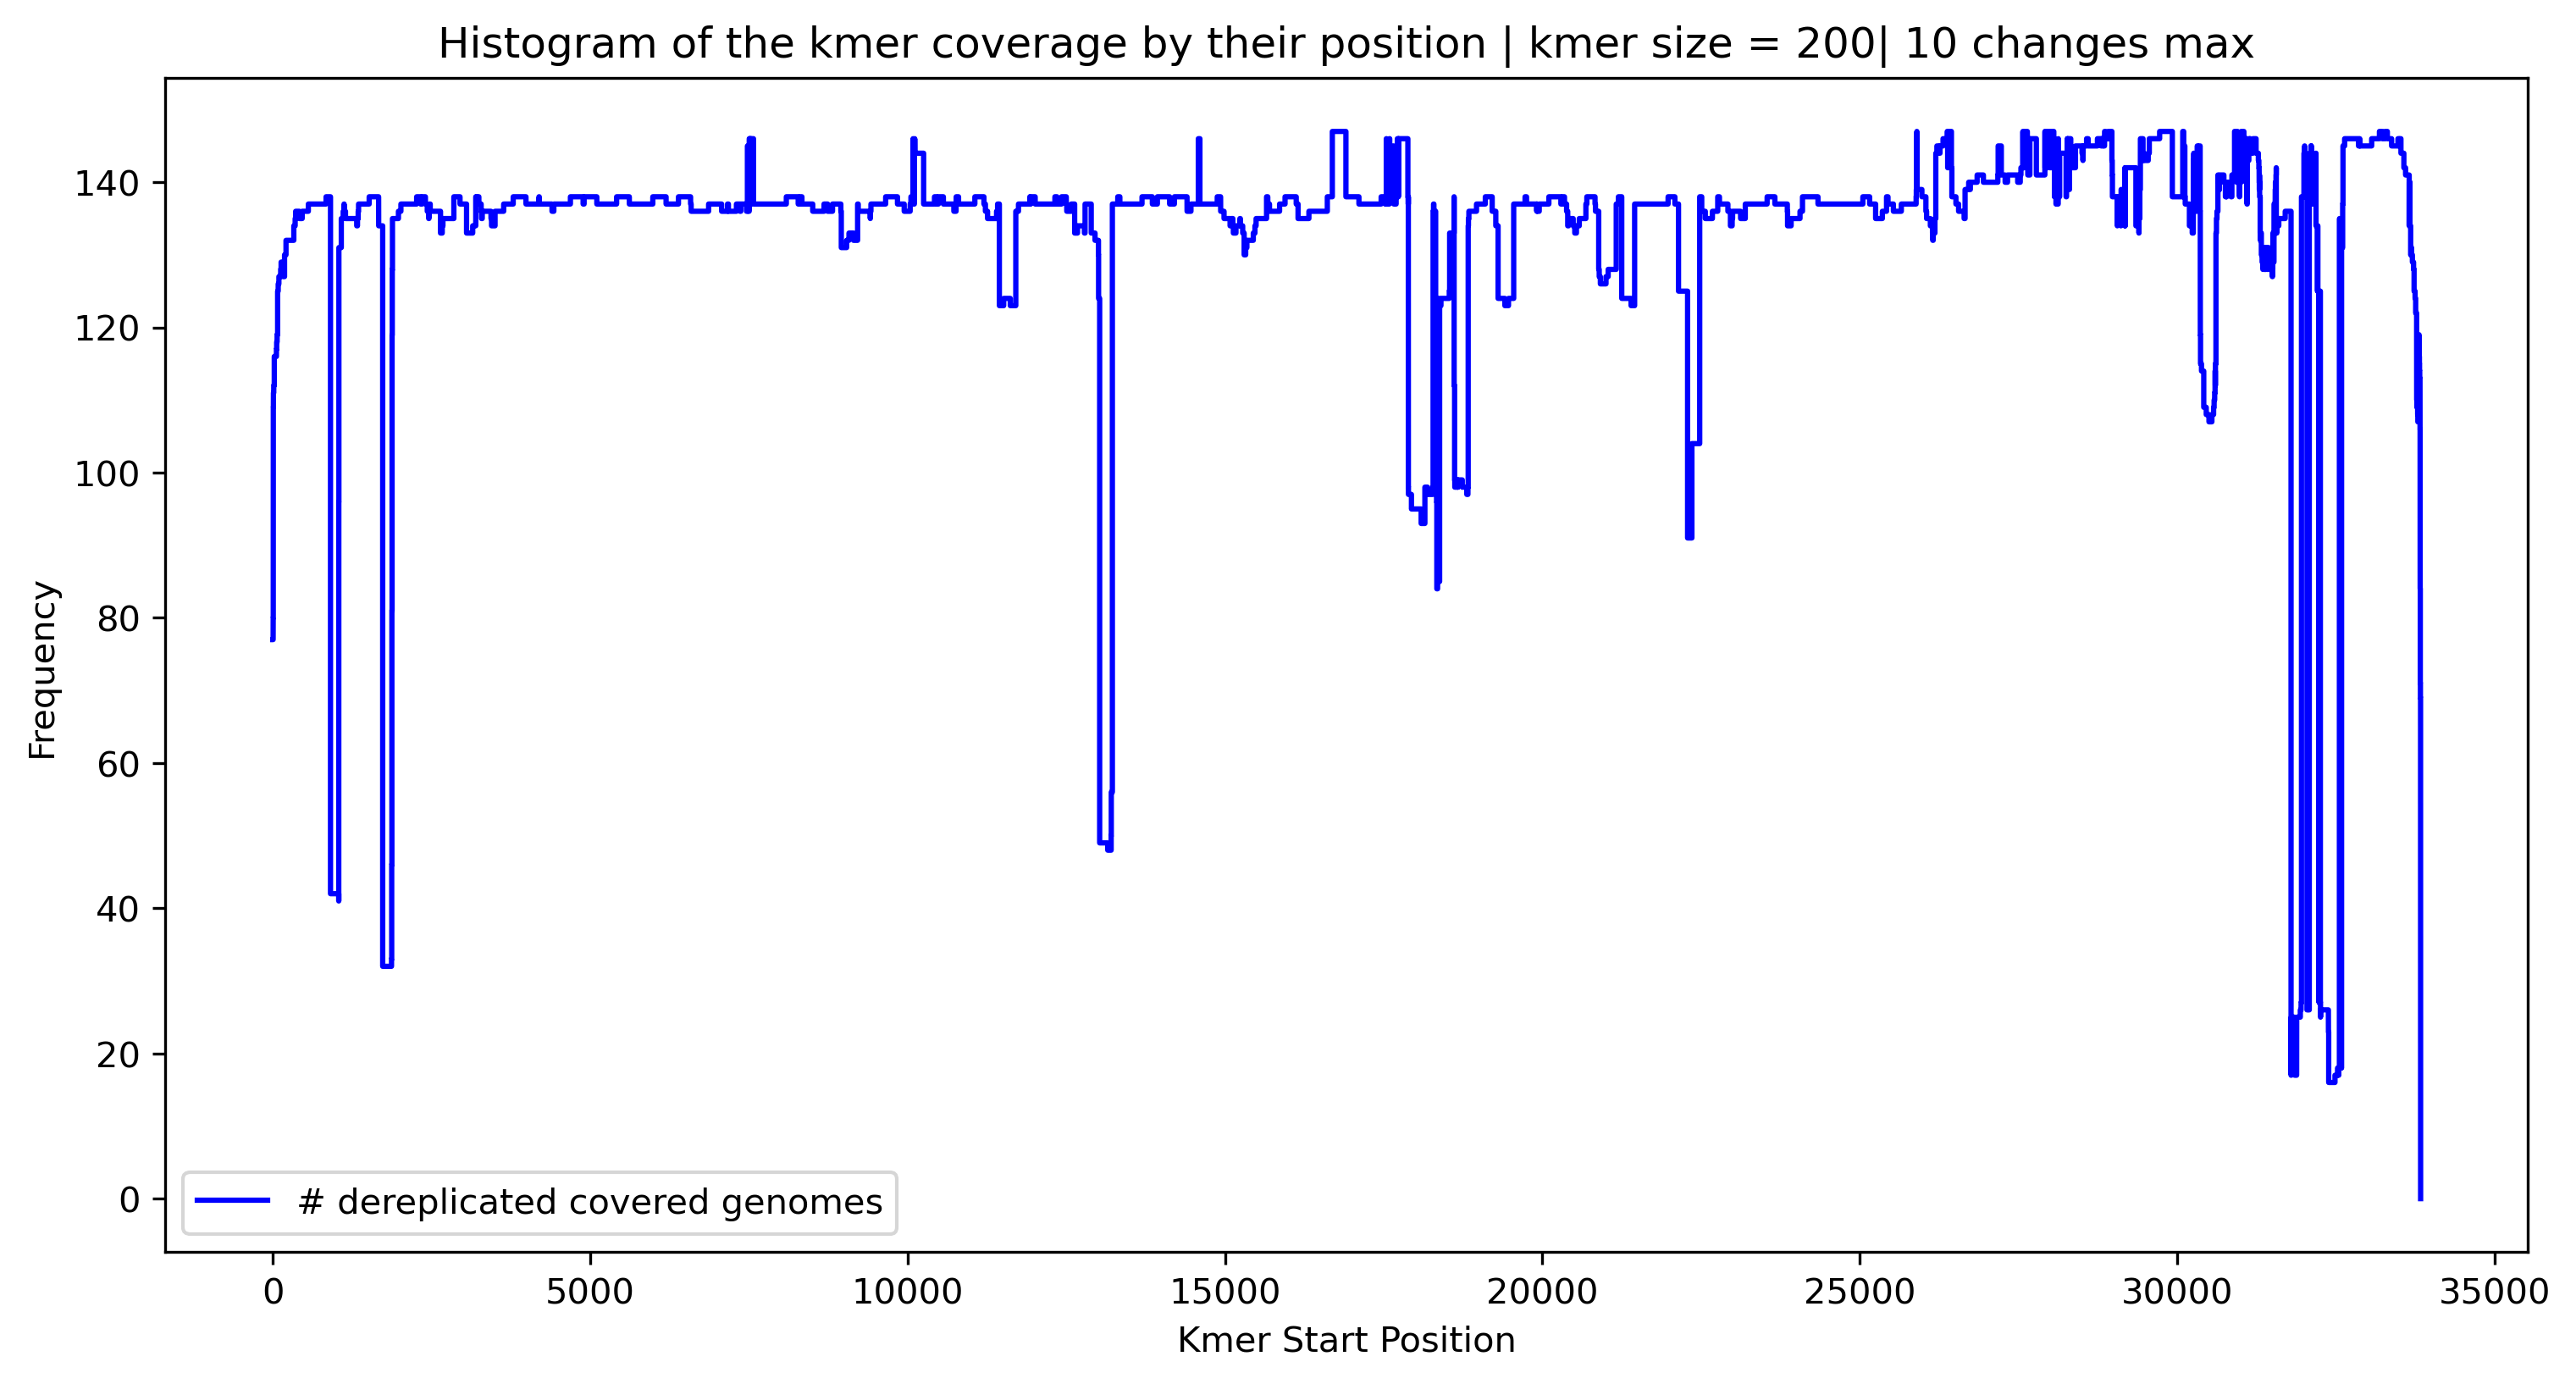

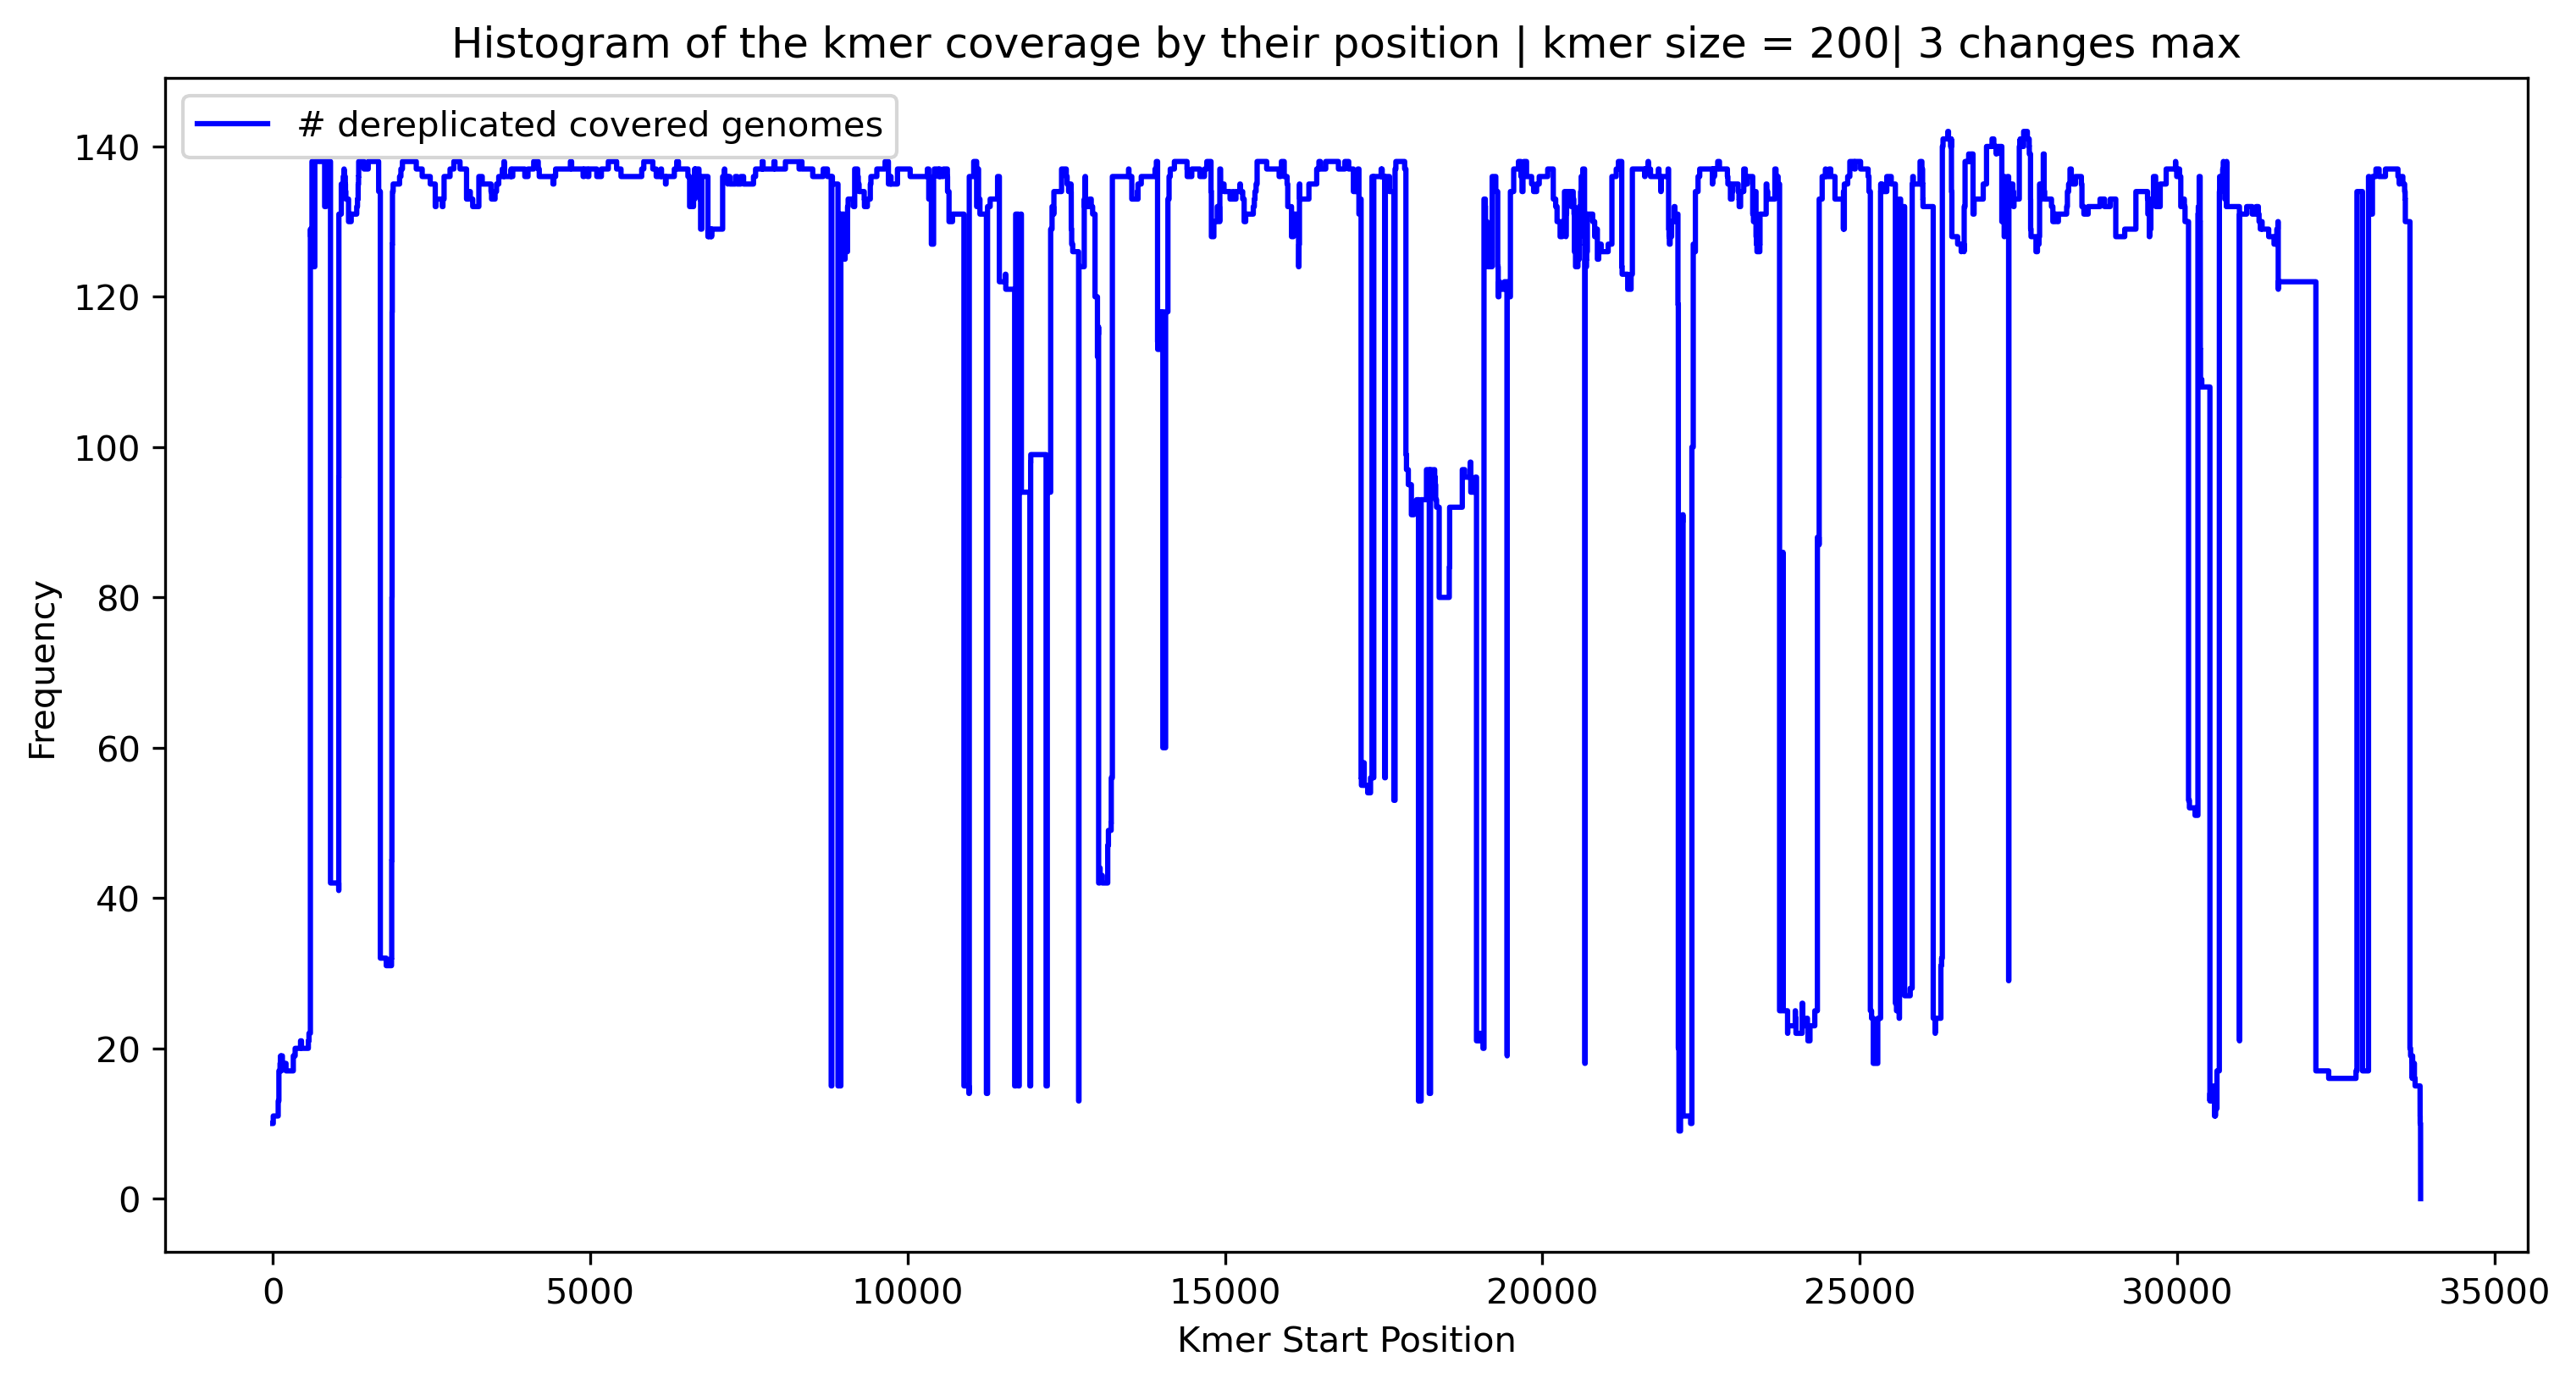

In [12]:
df.columns = df.columns.astype(int)
plot_rel_cons(df,kmer_size=KMER_SIZE, threshold=KMER_SIZE-THRESHOLD)
plot_rel_cons(df3, kmer_size=KMER_SIZE, threshold=3)


In [16]:
# This should be defined based on the plots you get
COVERAGE_RATIO = 140/ df3.shape[0]

# Crop DataFrame to L gene region and apply coverage threshold
# ldf = crop_df(df, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
# kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask, window_size=150)
ldf = crop_df(df3, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask3, window_size=KMER_SIZE)

Limiting DataFrame to gene region from position -1 to 35000
Minimum coverage threshold set to 140 based on coverage ratio 0.9523809523809523
DataFrame cropped to 324 columns with coverage above threshold.
Max coverage with 2 kmers: 0.9659863945578231


In [18]:
df_ref = read_fasta_to_dataframe(INPUT_REFERENCE)
ref_seq = df_ref['Sequence'].values[0]

# Extract kmer sequences
kmer1_seq = ref_seq[kmer1:kmer1+KMER_SIZE]
kmer2_seq = ref_seq[kmer2:kmer2+KMER_SIZE]

print(f"Kmer1 sequence (position {kmer1}):\n{kmer1_seq}")
print(f"Kmer2 sequence (position {kmer2}):\n{kmer2_seq}")




df_kmers1, df_kmers2 = pipeline_results_cleaner(sample_address=DEREP_FASTA_ALN,
                                                kmer1=kmer1,
                                                kmer2=kmer2,
                                                drop_old_samples=False,
                                                kmer_size= 200,
                                                min_year=2020,
                                                threshold_ratio=0.01,
                                                drop_mischar_samples=True
                                                # drop_mutants=False
                                               )


df_kmers1.to_csv(KMER1_PATH)
df_kmers2.to_csv(KMER2_PATH)


df_counts = count_non_gap_characters_from_dataframe(df_kmers1, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers1 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers1_mutations.png"))

df_counts = count_non_gap_characters_from_dataframe(df_kmers2, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers2 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers2_mutations.png"))

Kmer1 sequence (position 26432):
GACGCTCTTATTGTTCAAGGAAACAACAGCCTTTGTAACAACTGTACTGCTACTACTTTAACTCTTACACCTCCTTTTGTTCCCGGTCCATACTTGTGCATTGGCACAGGAAGAGGGCCTAGCTGCTTTAATCGCTGGACTTTACAAAAAGAGAACCTAACCACTACCACCCTCCTTCCCCTTACTACTTATACTTTTTC
Kmer2 sequence (position 26432):
GACGCTCTTATTGTTCAAGGAAACAACAGCCTTTGTAACAACTGTACTGCTACTACTTTAACTCTTACACCTCCTTTTGTTCCCGGTCCATACTTGTGCATTGGCACAGGAAGAGGGCCTAGCTGCTTTAATCGCTGGACTTTACAAAAAGAGAACCTAACCACTACCACCCTCCTTCCCCTTACTACTTATACTTTTTC
Read 147 samples from /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples/aligned/derep.fasta.aln.
df_samples shape before dropping NaN years: (147, 5)
df_samples shape after dropping NaN years: (147, 5)
df_samples shape after dropping samples with non ATCG chars: (142, 5)
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/adenoV_full/kmers1_mutations.png
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/adenoV_full/kmers2_mutations.png
